# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# OpenWeatherMap API Key
print(weather_api_key)

914a58f4c6ae6335dfcae85ae5a1666d


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "cod": "400",
    "message": "Nothing to geocode"
}


In [4]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print("Beginning Data Retrieval")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print("Data Retrieval Complete")

Beginning Data Retrieval
Processing Record 1 | Luanda
Processing Record 2 | Geraldton
Processing Record 3 | Lensk
Processing Record 4 | Kisangani
Processing Record 5 | Najrān
Processing Record 6 | Upernavik
Processing Record 7 | George Town
City not found. Skipping...
Processing Record 8 | Port Alfred
Processing Record 9 | Rikitea
City not found. Skipping...
Processing Record 10 | Hobart
Processing Record 11 | Ushuaia
Processing Record 12 | Arraial do Cabo
Processing Record 13 | Sirte
Processing Record 14 | Yerbogachën
Processing Record 15 | Mandera
Processing Record 16 | Atuona
Processing Record 17 | Meridian
Processing Record 18 | Forsytheganj
Processing Record 19 | Tuktoyaktuk
Processing Record 20 | Bredasdorp
City not found. Skipping...
Processing Record 21 | Thompson
Processing Record 22 | Mataura
Processing Record 23 | Faanui
Processing Record 24 | Itoman
Processing Record 25 | Busselton
Processing Record 26 | Nanortalik
Processing Record 27 | Kapaa
Processing Record 28 | Roebour

Processing Record 224 | Usinsk
Processing Record 225 | Vanimo
Processing Record 226 | Bow Island
Processing Record 227 | Clyde River
City not found. Skipping...
Processing Record 228 | Chara
Processing Record 229 | Saint Paul Harbor
Processing Record 230 | Chicama
Processing Record 231 | Kruisfontein
Processing Record 232 | High Level
Processing Record 233 | Sampit
Processing Record 234 | Fernie
City not found. Skipping...
Processing Record 235 | Broken Hill
Processing Record 236 | Inuvik
Processing Record 237 | Kidal
Processing Record 238 | Shakhtinsk
Processing Record 239 | Pangnirtung
Processing Record 240 | Dumka
Processing Record 241 | San Fernando del Valle de Catamarca
Processing Record 242 | Amahai
Processing Record 243 | Talnakh
Processing Record 244 | Kloulklubed
Processing Record 245 | Khanbari
Processing Record 246 | Tazovsky
City not found. Skipping...
Processing Record 247 | Chāndor
Processing Record 248 | Ayna
Processing Record 249 | Pacific Grove
City not found. Skippin

Processing Record 458 | Belmonte
Processing Record 459 | San Policarpo
Processing Record 460 | Sittwe
Processing Record 461 | Pandamatenga
Processing Record 462 | La Orilla
Processing Record 463 | Westport
Processing Record 464 | Ostrovnoy
Processing Record 465 | Atar
Processing Record 466 | Altar
Processing Record 467 | Hamilton
Processing Record 468 | Ambon City
Processing Record 469 | Bayan
Processing Record 470 | Marabu
Processing Record 471 | Wanning
Processing Record 472 | Fort Frances
Processing Record 473 | Kendari
Processing Record 474 | Basco
Processing Record 475 | Ekhabi
Processing Record 476 | Quelimane
Processing Record 477 | Taitung City
Processing Record 478 | Bad Liebenwerda
Processing Record 479 | Mokhsogollokh
Processing Record 480 | Kapuskasing
Processing Record 481 | Athabasca
Processing Record 482 | Kieta
Processing Record 483 | Santa Maria
Processing Record 484 | Menongue
Processing Record 485 | Mehamn
Processing Record 486 | Deputatsky
Processing Record 487 | Si

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionaryfrom Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

#Create a Dataframe from the dictionary
weather_df = pd.DataFrame(weather_dict)

#Display the DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Luanda,AO,1622603728,-8.8368,13.2343,77.00,88,75,3.44
1,Geraldton,AU,1622603884,-28.7667,114.6000,64.81,59,0,6.71
2,Lensk,RU,1622603885,60.7253,114.9278,78.40,33,99,3.71
3,Kisangani,CD,1622603885,0.5167,25.2000,69.84,94,91,2.19
4,Najrān,SA,1622603886,17.4924,44.1277,72.25,19,23,3.62


In [6]:
# Export the city data into a .csv.
weather_df.to_csv("./Figures/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#show key stats
weather_df.describe()



,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.540000e+02,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,1.622604e+09,20.431145,19.977205,67.022455,68.137184,57.487365,7.409964
std,1.089160e+02,33.043021,91.976746,15.003760,20.929727,38.417673,5.184737
min,1.622603e+09,-54.800000,-179.166700,21.310000,7.000000,0.000000,0.000000
25%,1.622604e+09,-5.549750,-60.119375,57.217500,57.000000,18.000000,3.440000
50%,1.622604e+09,24.860650,25.671850,69.055000,73.000000,69.000000,6.110000
75%,1.622604e+09,49.479225,102.899075,78.810000,83.000000,95.000000,10.755000
max,1.622604e+09,78.218600,179.316700,96.620000,100.000000,100.000000,32.390000


In [8]:
#  Get the indices of cities that have humidity over 100%.
#  SKIP 
#  Note: max humidity =100%

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#SKIP because max humitiy not >100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

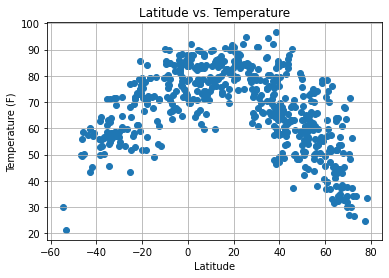

In [10]:
x_latitutude = weather_df["Latitude"]
y_temperature = weather_df["Max Temperature"]
plt.scatter(x_latitutude, y_temperature)

plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("./Figures/Latitude_vs_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

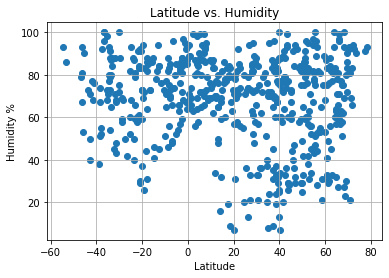

In [11]:
y_humidity = weather_df["Humidity"]
plt.scatter(x_latitutude, y_humidity)

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("./Figures/CLatitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

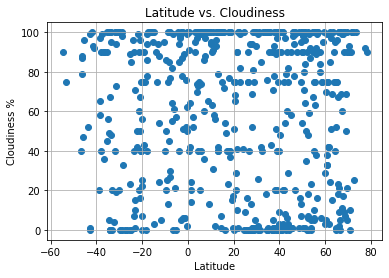

In [12]:
y_cloudiness=weather_df["Cloudiness"]
plt.scatter(x_latitutude, y_cloudiness)

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("./Figures/Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

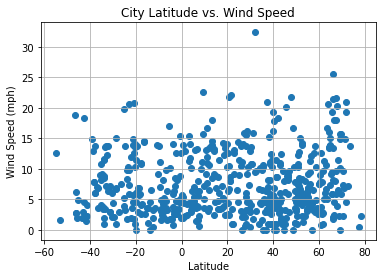

In [13]:
y_speed=weather_df["Wind Speed"]
plt.scatter(x_latitutude, y_speed)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("./Figures/Latitude_vs_Wind_Speed.png")

plt.show()

## Linear Regression

In [14]:
#seperate plots into Northern vs. Southern Hemisphere
northern_df = weather_df.loc[weather_df["Latitude"] >= 0,:]
southern_df = weather_df.loc[weather_df["Latitude"] < 0,:]

northern_df.head()
southern_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Luanda,AO,1622603728,-8.8368,13.2343,77.00,88,75,3.44
1,Geraldton,AU,1622603884,-28.7667,114.6000,64.81,59,0,6.71
7,Port Alfred,ZA,1622603889,-33.5906,26.8910,58.28,87,48,13.65
8,Rikitea,PF,1622603890,-23.1203,-134.9692,71.35,59,10,20.62
9,Hobart,AU,1622603703,-42.8794,147.3294,60.26,50,0,3.00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
x_northern = northern_df["Latitude"]
y_northern = northern_df["Max Temperature"]
model = linregress(x_northern,y_northern)
model


LinregressResult(slope=-0.5760151330274346, intercept=88.97717416597462, rvalue=-0.7319376345195754, pvalue=3.947705561028267e-66, stderr=0.027328355463154295)

y = -0.58x + 88.98
R-Squared: -0.73


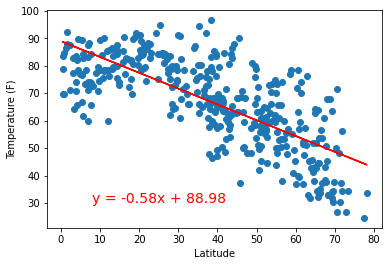

Low R-squared indicates no evidence from model that latitude influences Max Temp


<Figure size 432x288 with 0 Axes>

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_northern,y_northern)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_northern * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,2)))

plt.scatter(x_northern,y_northern)
plt.plot(x_northern,regression,"r")
plt.annotate(line_eq,(8,30),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

plt.savefig('North_Lat_Temp')
print('Low R-squared indicates no evidence from model that latitude influences Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.66x + 81.29
R-Squared: 0.74


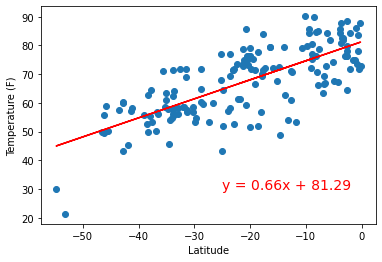

0.78 R-squared indicates some evidence from model that latitude influences Max Temp in the Southern Hemisphere. For every +1 latitude measure, temperature increases 0.69


<Figure size 432x288 with 0 Axes>

In [17]:
x_southern = southern_df["Latitude"]
y_southern = southern_df["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_southern,y_southern)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_southern * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,2)))

plt.scatter(x_southern,y_southern)
plt.plot(x_southern,regression,"r")
plt.annotate(line_eq,(-25,30),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

plt.savefig('South_Lat_Temp')
print('0.78 R-squared indicates some evidence from model that latitude influences Max Temp in the Southern Hemisphere. For every +1 latitude measure, temperature increases 0.69')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.11x + 70.56
R-Squared: -0.1


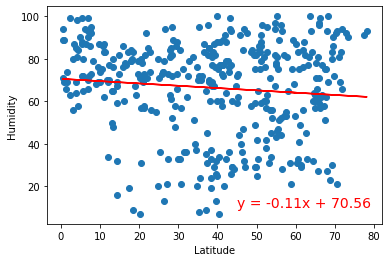

Low R-squared indicates no evidence from model that latitude influences Humidity in N. Hemisphere


<Figure size 432x288 with 0 Axes>

In [18]:
x_northern = northern_df["Latitude"]
y_northern = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_northern,y_northern)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_northern * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,2)))

plt.scatter(x_northern,y_northern)
plt.plot(x_northern,regression,"r")
plt.annotate(line_eq,(45,10),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig('North_Lat_Humidity')
print('Low R-squared indicates no evidence from model that latitude influences Humidity in N. Hemisphere')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.03x + 72.71
R-Squared: 0.02


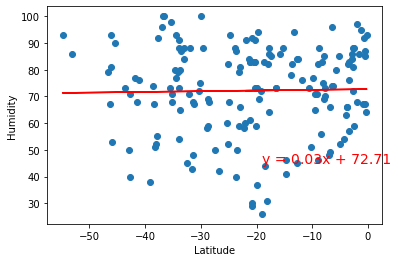

Low R-squared indicates no evidence from model that latitude influences Humidity in S. Hemisphere


<Figure size 432x288 with 0 Axes>

In [19]:
x_southern = southern_df["Latitude"]
y_southern = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_southern,y_southern)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_southern * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,2)))

plt.scatter(x_southern,y_southern)
plt.plot(x_southern,regression,"r")
plt.annotate(line_eq,(-19,45),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig('South_Lat_Humidity')
print('Low R-squared indicates no evidence from model that latitude influences Humidity in S. Hemisphere')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.14x + 61.98
R-Squared: -0.07


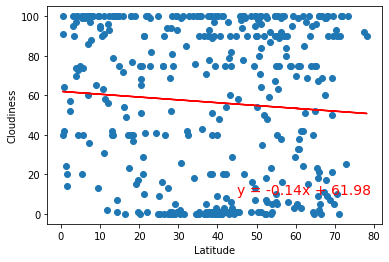

Low R-squared indicates no evidence from model that latitude influences Cloudiness


<Figure size 432x288 with 0 Axes>

In [20]:
x_northern = northern_df["Latitude"]
y_northern = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_northern,y_northern)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_northern * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,2)))

plt.scatter(x_northern,y_northern)
plt.plot(x_northern,regression,"r")
plt.annotate(line_eq,(45,10),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig('North_Lat_Cloudiness')
print('Low R-squared indicates no evidence from model that latitude influences Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.11x + 61.99
R-Squared: 0.04


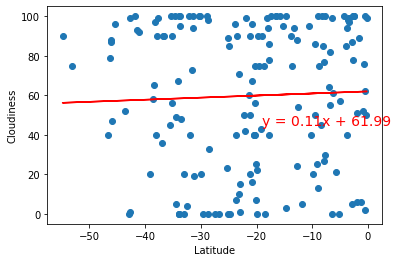

Low R-squared indicates no evidence from model that latitude influences Cloudiness


<Figure size 432x288 with 0 Axes>

In [21]:
x_southern = southern_df["Latitude"]
y_southern = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_southern,y_southern)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_southern * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,2)))

plt.scatter(x_southern,y_southern)
plt.plot(x_southern,regression,"r")
plt.annotate(line_eq,(-19,45),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig('South_Lat_Cloudiness')
print('Low R-squared indicates no evidence from model that latitude influences Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x + 7.14
R-Squared: 0.05


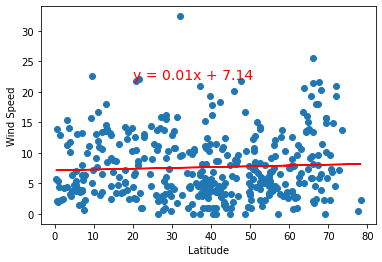

Low R-squared indicates no evidence from model that latitude influences Wind Speed


<Figure size 432x288 with 0 Axes>

In [22]:
x_northern = northern_df["Latitude"]
y_northern = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_northern,y_northern)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_northern * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,2)))

plt.scatter(x_northern,y_northern)
plt.plot(x_northern,regression,"r")
plt.annotate(line_eq,(20,22),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.savefig('North_Lat_Wind Speed')
print('Low R-squared indicates no evidence from model that latitude influences Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.04x + 6.05
R-Squared: -0.1093675692


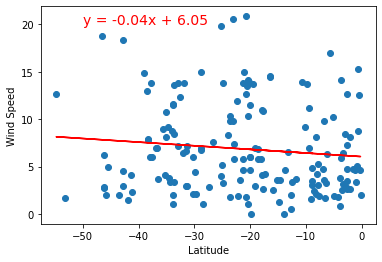

Low R-squared indicates no evidence from model that latitude influences Wind Speed


<Figure size 432x288 with 0 Axes>

In [23]:
x_southern = southern_df["Latitude"]
y_southern = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_southern,y_southern)
model = (slope, intercept, rvalue, pvalue, stderr)
regression = x_southern * slope + intercept
#print(model)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("R-Squared:",str(round(rvalue,10)))

plt.scatter(x_southern,y_southern)
plt.plot(x_southern,regression,"r")
plt.annotate(line_eq,(-50,20),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.savefig('South_Lat_Wind Speed')
print('Low R-squared indicates no evidence from model that latitude influences Wind Speed')